In [1]:
import data_utilis as du
import Package_
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import fake_data
reload(fake_data)
reload(du)

<module 'data_utilis' from 'C:\\Users\\wscarpa\\PycharmProjects\\ipac_focus\\data_utilis.py'>

In [ ]:
#### Small check is normalizing by turns equal as normalizing by smaple length ????
turns = [50e3, 100e3, 150e3, 200e3, 300e3]
peaks = []
for turn in turns:
    blm = fake_data.generate_fake_blm(100e3, turn)
    binned = fake_data.bin_fake_data(blm,normalize_parts=True, normalize_turns=True, normalize_counts=False,add_errors = False)
    fftres = du.Ft(binned[1],binned[0][1], window = 'flattop', normalize_particles = False, plot=False , normalize_N =False)
    peaks.append(np.interp(100,fftres[0],fftres[1]))
plt.plot(turns,peaks)

In [ ]:
#### Small check is normalizing by turns equal as normalizing by smaple length ????
turns = [50e3, 100e3, 150e3, 200e3, 300e3]
peaks = []
for turn in turns:
    blm = fake_data.generate_fake_blm(100e3, turn)
    binned = fake_data.bin_fake_data(blm,normalize_parts=False, normalize_turns=False, normalize_counts=False,add_errors = False)
    fftres = du.Ft(binned[1],binned[0][1], window = 'flattop', normalize_particles = False, plot=False , normalize_N =True)
    peaks.append(np.interp(100,fftres[0],fftres[1]))
plt.plot(turns,peaks)

In [ ]:
#### Small check is normalizing by turns equal as normalizing by smaple length ????
turns = [50e3, 100e3, 150e3, 200e3, 300e3]
peaks = []
for turn in turns:
    blm = fake_data.generate_fake_blm(100e3, turn)
    binned = fake_data.bin_fake_data(blm,normalize_parts=False, normalize_turns=False, normalize_counts=False,add_errors = False)
    fftres = du.Ft(binned[1],binned[0][1], window = 'flattop', normalize_particles = False, plot=False , normalize_N =False)
    peaks.append(np.interp(100,fftres[0],fftres[1]))
plt.plot(turns,peaks)

In [ ]:
#### Small check is normalizing by turns equal as normalizing by smaple length ????
turns = [50e3, 100e3, 150e3, 200e3, 300e3]
peaks = []
for turn in turns:
    blm = fake_data.generate_fake_blm(100e3, turn)
    binned = fake_data.bin_fake_data(blm,normalize_parts=False, normalize_turns=False, normalize_counts=False,add_errors = False)
    fftres = du.Ft(binned[1],binned[0][1], window = None, normalize_particles = False, plot=False , normalize_N =False)
    peaks.append(np.interp(100,fftres[0],fftres[1]))
plt.plot(turns,peaks)

## Numerical errors

- Windowing or not errors
    - power wrror and peaks error
    
**For loop** : to evaluate at different conditions how the maxim error vs the shift varies    
    

    
- Poisson's error
    - power and peaks error


Errors **without the windowing**

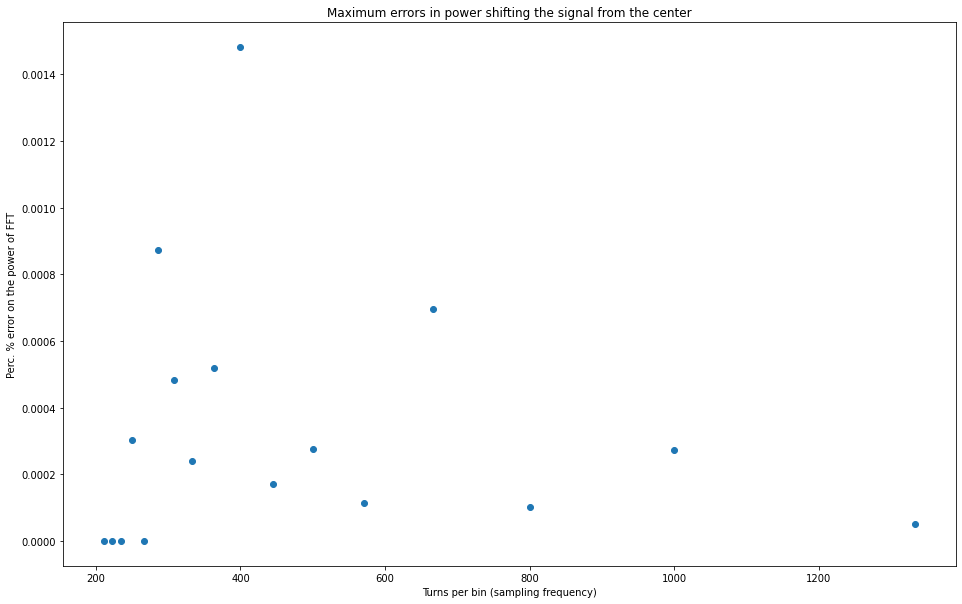

In [2]:
###### Spanning all the various allowed binnings to stay inside the detection frequency
max_pvar = []
max_err = []
shifts = np.linspace(0,2*np.pi,100)
for bin_osc in np.arange(3,20):
    peaks = []
    errs = []

    for shift in shifts:
        dicti = fake_data.data_centered(50e3, shift=shift, n_osc_sig=30, revT=2.5e-6, binsXosc=bin_osc, f=100, plot=False, return_all = True, print_info = False,
                  normalize_N=True, normalize_turns=False, normalize_particles=False)
        peaks.append(dicti['peak'])
        errs.append(dicti['err_pw'])
    max_err.append(np.max(errs))
    max_pvar.append(np.std(peaks)/np.mean(peaks))

plt.figure(figsize=(16,10))
plt.scatter(4000/np.arange(3,20),max_err)
plt.title('Maximum errors in power shifting the signal from the center')
plt.ylabel('Perc. % error on the power of FFT')
plt.xlabel('Turns per bin (sampling frequency)')
plt.savefig('err_shift100.png')

plt.figure(figsize=(16,10))

plt.scatter(4000/np.arange(3,20),max_pvar)
plt.title('Variances in the peaks due to shifting the signal from the center')
plt.ylabel('Relative variance of peaks std/mean')
plt.xlabel('Turns per bin (sampling frequency)')
plt.savefig('max_var_shifts100.png')

**WITH WINDOWING**

Text(0.5, 0, 'Turns per bin (sampling frequency)')

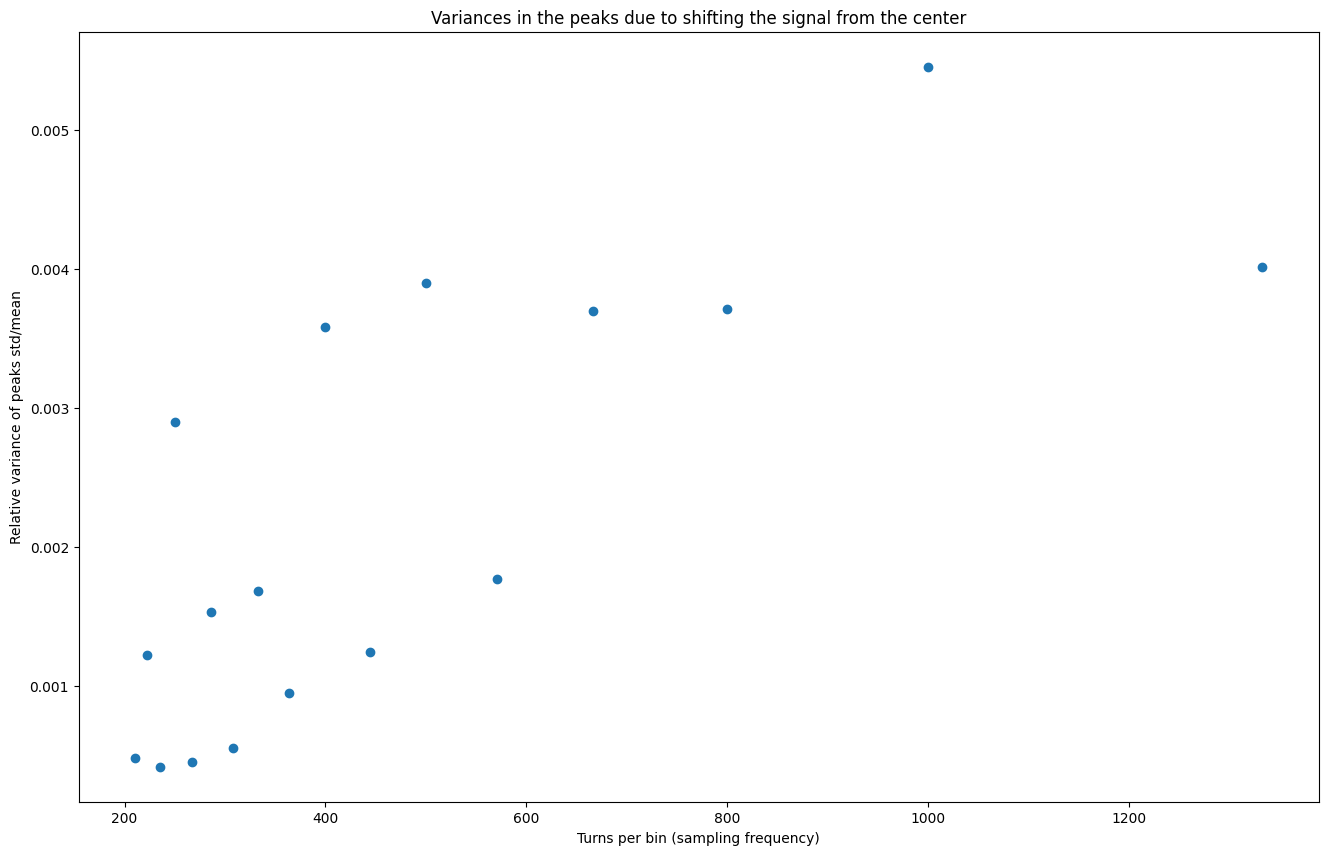

In [2]:
###### WINDOW = flattop
max_pvar = []
max_err = []
shifts = np.linspace(0,2*np.pi,100)
for bin_osc in np.arange(3,20):
    peaks = []
    errs = []

    for shift in shifts:
        dicti = fake_data.data_centered(50e3, shift=shift, window = 'flattop', n_osc_sig=30, revT=2.5e-6, binsXosc=bin_osc, f=100, plot=False, return_all = True, print_info = False,
                  normalize_N=True, normalize_turns=False, normalize_particles=False)
        peaks.append(dicti['peak'])
        errs.append(dicti['err_pw'])
    max_err.append(np.max(errs))
    max_pvar.append(np.std(peaks)/np.mean(peaks))
    
plt.figure(figsize=(16,10))
plt.scatter(4000/np.arange(3,20),max_err)
plt.title('Maximum errors in power shifting the signal from the center')
plt.ylabel('Perc. % error on the power of FFT')
plt.xlabel('Turns per bin (sampling frequency)')
# plt.savefig('err_shift100_Wflattop.png')

plt.figure(figsize=(16,10))
plt.scatter(4000/np.arange(3,20),max_pvar)
plt.title('Variances in the peaks due to shifting the signal from the center')
plt.ylabel('Relative variance of peaks std/mean')
plt.xlabel('Turns per bin (sampling frequency)')
# plt.savefig('max_var_shifts100_Wflattop.png')

In [ ]:
###### WINDOW = hann
max_pvar = []
max_err = []
shifts = np.linspace(0,2*np.pi,100)
for bin_osc in np.arange(3,20):
    peaks = []
    errs = []

    for shift in shifts:
        dicti = fake_data.data_centered(50e3, shift=shift, window = 'hann', n_osc_sig=30, revT=2.5e-6, binsXosc=bin_osc, f=100, plot=False, return_all = True, print_info = False,
                  normalize_N=True, normalize_turns=False, normalize_particles=False)
        peaks.append(dicti['peak'])
        errs.append(dicti['err_pw'])
    max_err.append(np.max(errs))
    max_pvar.append(np.std(peaks)/np.mean(peaks))
    
plt.figure(figsize=(16,10))
plt.scatter(4000/np.arange(3,20),max_err)
plt.title('Maximum errors in power shifting the signal from the center')
plt.ylabel('Perc. % error on the power of FFT')
plt.xlabel('Turns per bin (sampling frequency)')
# plt.savefig('err_shift100_Wflattop.png')

plt.figure(figsize=(16,10))
plt.scatter(4000/np.arange(3,20),max_pvar)
plt.title('Variances in the peaks due to shifting the signal from the center')
plt.ylabel('Relative variance of peaks std/mean')
plt.xlabel('Turns per bin (sampling frequency)')
# plt.savefig('max_var_shifts100_Wflattop.png')

Text(0.5, 0, 'Turns per bin (sampling frequency)')

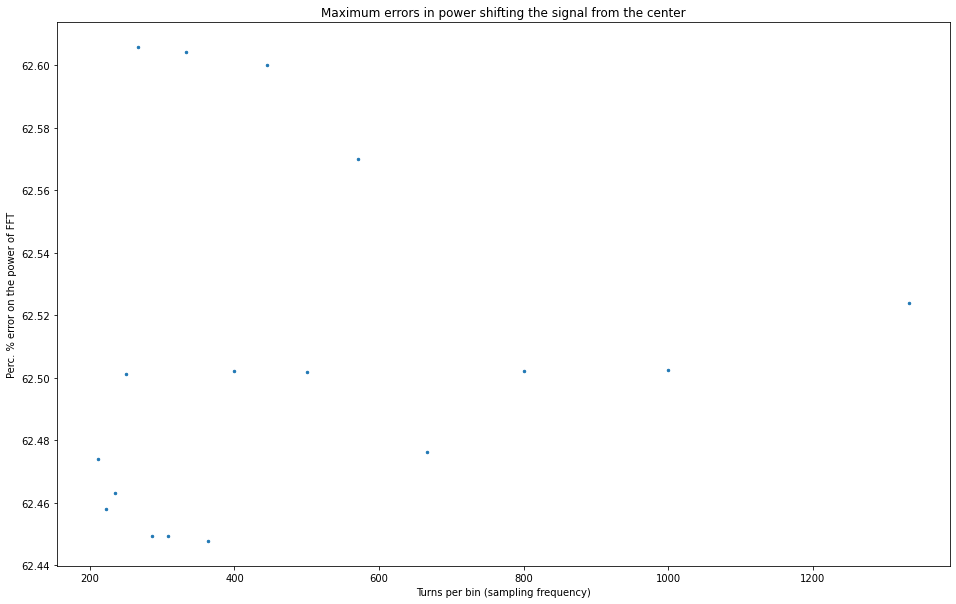

In [4]:
###### WINDOW = flattop
max_pvar = []
max_err = []
shifts = np.linspace(0,2*np.pi,100)
for bin_osc in np.arange(3,20):
    peaks = []
    errs = []

    for shift in shifts:
        dicti = fake_data.data_centered(50e3, shift=shift, window = 'hann', n_osc_sig=30, revT=2.5e-6, binsXosc=bin_osc, f=100, plot=False, return_all = True, print_info = False,
                  normalize_N=True, normalize_turns=False, normalize_particles=False)
        peaks.append(dicti['peak'])
        errs.append(dicti['err_pw'])
    max_err.append(np.max(errs))
    max_pvar.append(np.std(peaks)/np.mean(peaks))
    
plt.figure(figsize=(16,10))
plt.scatter(4000/np.arange(3,20),max_err)
plt.title('Maximum errors in power shifting the signal from the center')
plt.ylabel('Perc. % error on the power of FFT')
plt.xlabel('Turns per bin (sampling frequency)')
plt.savefig('err_shift100_Whann.png')

plt.figure(figsize=(16,10))
plt.scatter(4000/np.arange(3,20),max_pvar)
plt.title('Variances in the peaks due to shifting the signal from the center')
plt.ylabel('Relative variance of peaks std/mean')
plt.xlabel('Turns per bin (sampling frequency)')
plt.savefig('max_var_shifts100_Whann.png')

In [ ]:
# KEEP AS EXAMPLE FOR ME
peaks = []
errs = []
shifts = np.linspace(0,2*np.pi,100)
for shift in shifts:
    dicti = fake_data.data_centered(100e3, shift=shift, n_osc_sig=10, revT=2.5e-6, binsXosc=100, f=100, plot=False, return_all = True, print_info = False,
                  normalize_N=True, normalize_turns=False, normalize_particles=False)
    peaks.append(dicti['peak'])
    errs.append(dicti['err_pw'])
plt.plot(shifts,errs)
plt.figure()
plt.plot(shifts,peaks)
print(f'The relative fluctuation of the peaks {np.std(peaks)/np.mean(peaks)}')
print(f'The maximum power error {np.max(errs)}')